In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
Cat_Features=df.select_dtypes(include='object')

In [7]:
#Printing All Unique Values For Categorical Features
for i in Cat_Features.columns:
    if i=='Car_Name':
        pass
    else:
        print(i)
        print(df[i].unique())
        print('-'*25)

Fuel_Type
['Petrol' 'Diesel' 'CNG']
-------------------------
Seller_Type
['Dealer' 'Individual']
-------------------------
Transmission
['Manual' 'Automatic']
-------------------------


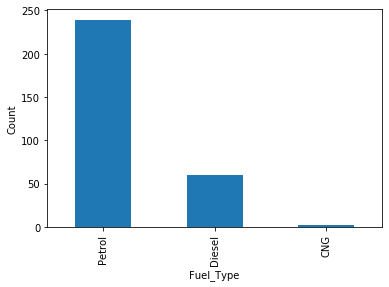

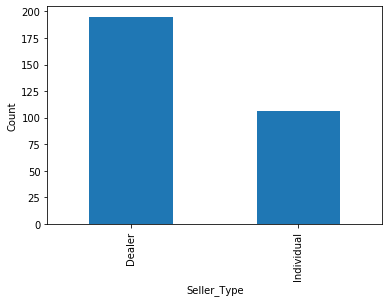

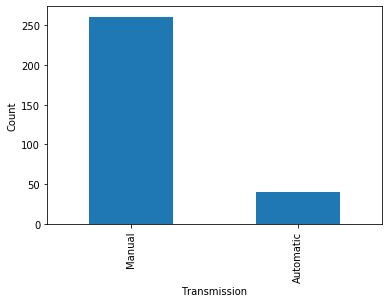

In [8]:
#Display Bar Graphs For All Categorical Features
for i in Cat_Features.columns:
    if i=='Car_Name':
        pass
    else:
        df[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [9]:
Num_Features=df.select_dtypes(exclude='object')

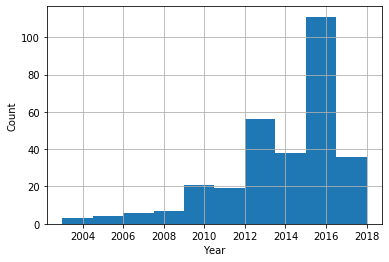

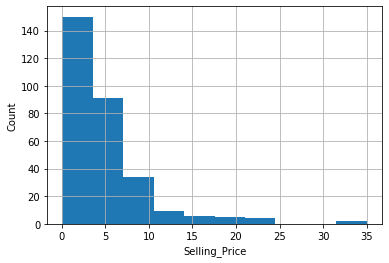

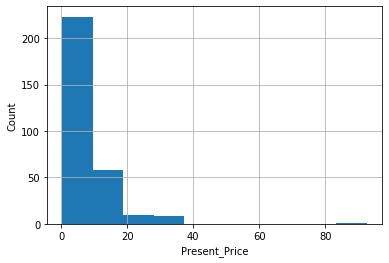

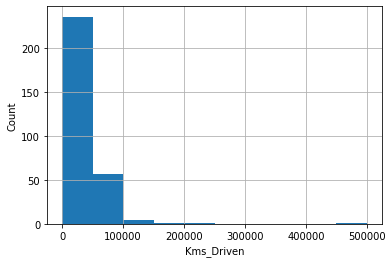

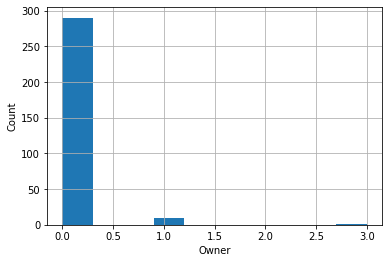

In [10]:
#Display Histograms For All Numerical Features
for i in Num_Features.columns:
        df[i].hist()
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

In [11]:
df['No_Of_Years']=2020-df['Year']

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [15]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [19]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
# Independent and Dependent Features
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [21]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.34794452 0.04357791 0.00049027 0.07535227 0.24403218 0.01010113
 0.12152561 0.15697612]


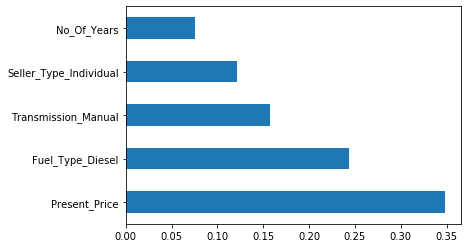

In [28]:
#Plot graph for featuresimportances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
# Ramdomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of festures to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree 
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[2,5,10,15,100]

In [63]:
rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
#Create Ramdom Grid 
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':Max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}


In [65]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=400, min_

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [67]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [68]:
rf_random.best_score_

-5.39597733468746

In [69]:
predictions=rf_random.predict(X_test)

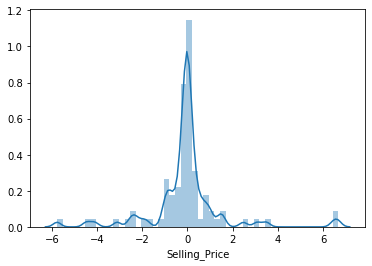

In [70]:
sns.distplot(y_test-predictions)

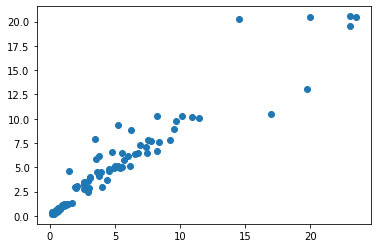

In [71]:
plt.scatter(y_test,predictions)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8618243932004234
MSE: 2.642944824890788
RMSE: 1.6257136355738633


In [ ]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)